# Here We Add Some Used Libiraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read Data

In [2]:
titanic = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [3]:
df = titanic.copy()

# Explore Data (EDA) 

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#split data
from sklearn.model_selection import train_test_split
train, validation= train_test_split(df , test_size = 0.3, random_state=0)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 857 to 684
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Name         623 non-null    object 
 4   Sex          623 non-null    object 
 5   Age          502 non-null    float64
 6   SibSp        623 non-null    int64  
 7   Parch        623 non-null    int64  
 8   Ticket       623 non-null    object 
 9   Fare         623 non-null    float64
 10  Cabin        152 non-null    object 
 11  Embarked     621 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 63.3+ KB


In [7]:
#show numerical feature relation
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,623.000000,623.000000,623.000000,502.000000,623.000000,623.000000,623.000000
mean,447.678973,0.388443,2.287319,29.915339,0.531300,0.393258,32.458273
std,258.248011,0.487788,0.840657,14.506994,1.162891,0.832085,48.257658
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,217.500000,0.000000,1.500000,21.000000,0.000000,0.000000,7.925000
50%,449.000000,0.000000,3.000000,29.000000,0.000000,0.000000,15.000000
75%,670.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.387500
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#show null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            121
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          471
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='Age'>

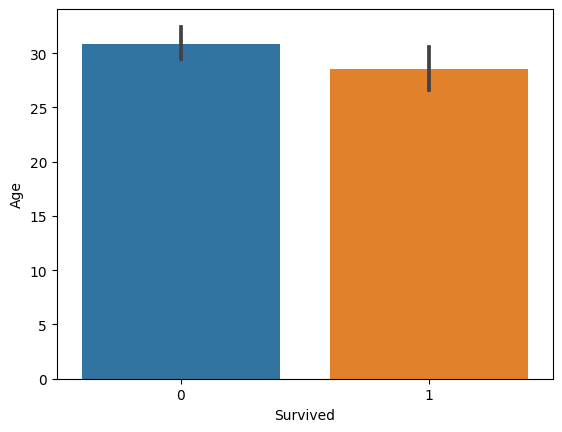

In [9]:
#show relation between Survival and age
sns.barplot(data = train , x = 'Survived' , y ='Age')

<Axes: xlabel='Pclass', ylabel='Survived'>

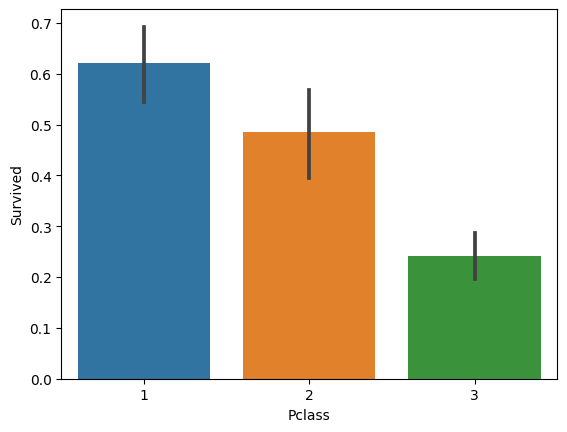

In [10]:
#show relation between Survival and Pclass
sns.barplot(data = train , x = 'Pclass' , y ='Survived')

<Axes: xlabel='Survived', ylabel='count'>

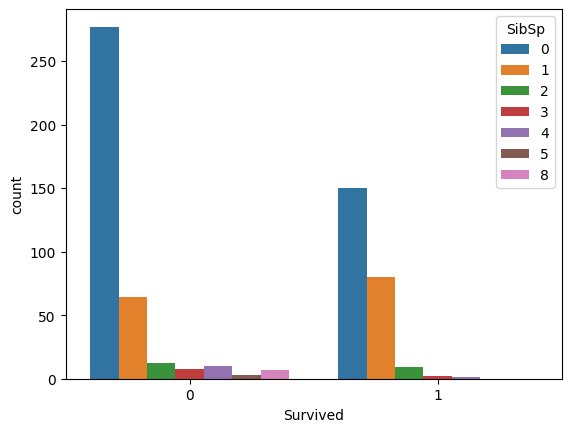

In [11]:
#show relation between Survival and SibSp
sns.countplot(data = train , x = 'Survived' , hue ='SibSp')

<Axes: xlabel='Survived', ylabel='count'>

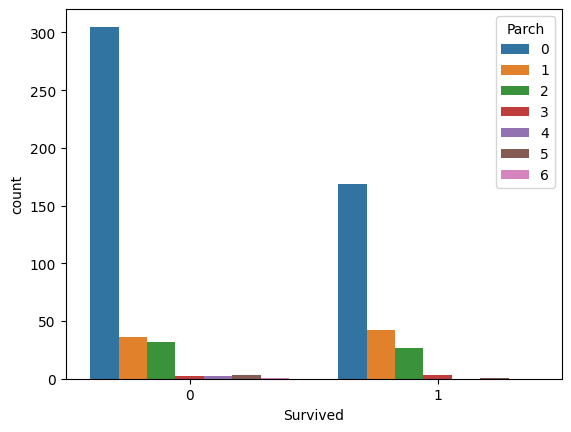

In [12]:
#show relation between Survival and Parch
sns.countplot(data = train , x = 'Survived' , hue ='Parch')

<Axes: xlabel='Survived', ylabel='Fare'>

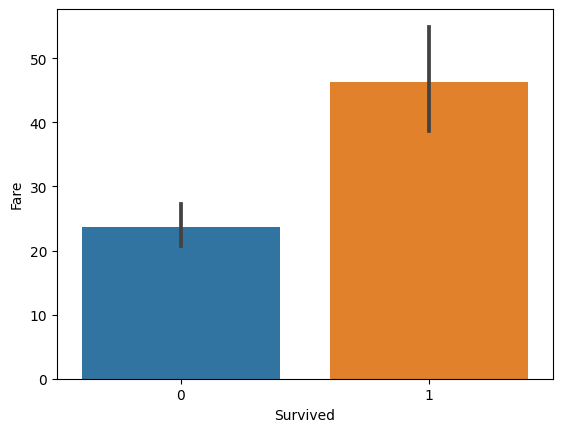

In [13]:
#show relation between Survival and Fare
sns.barplot(data = train , x = 'Survived' , y ='Fare')

<Axes: xlabel='Fare', ylabel='Count'>

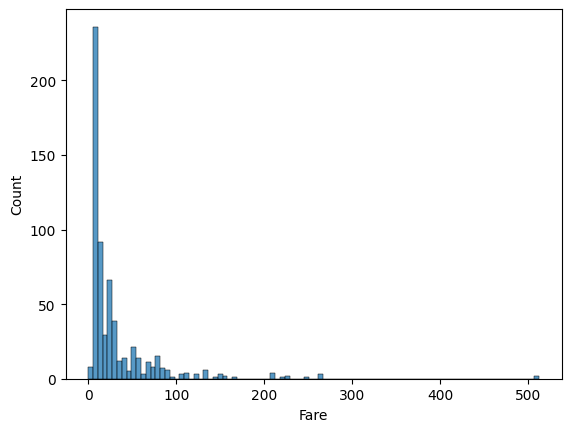

In [14]:
sns.histplot(data = train  ,x ='Fare')

<Axes: xlabel='Sex', ylabel='count'>

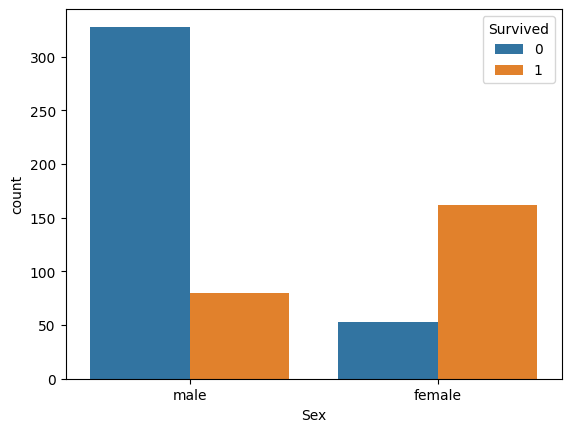

In [15]:
#show relation between Survival and Sex
sns.countplot(data = train , x = 'Sex' , hue ='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

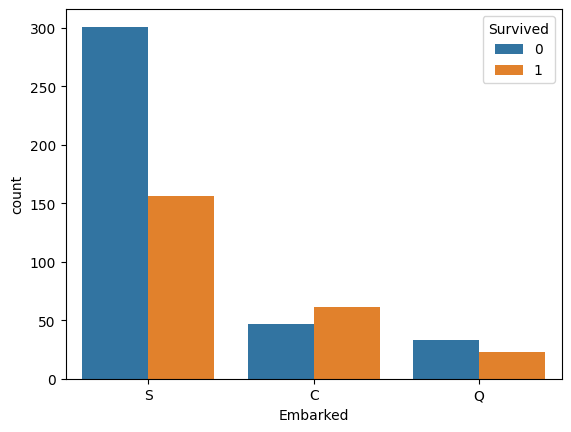

In [16]:
#show relation between Survival and Embarked
sns.countplot(data = train , x = 'Embarked' , hue ='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

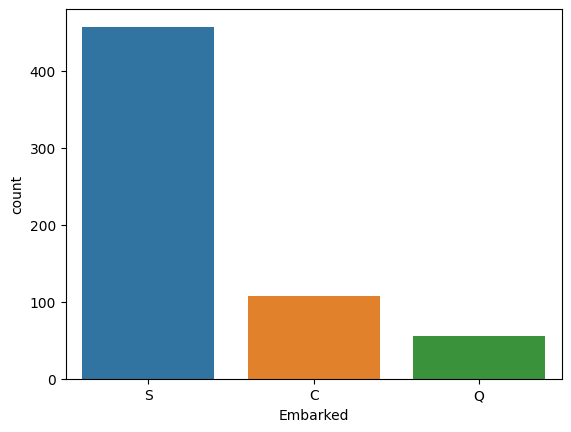

In [17]:
#show count of passenger at each embarked
sns.countplot(data = train , x = 'Embarked' )

# From The Above Data We Found some information
#### 1-There is a relationship between survival and each of Pclass, SibSp, Parch, Sex, Fare             
#### 2-There is a few relationship between survival and age                                                 
#### 3-There is a relationship between survival and embarked but the number of passengers between each embarked is different
#### 4-There is a relationship between fare and Pclass

In [18]:
#cheeck for nulls
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            121
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          471
Embarked         2
dtype: int64

In [19]:
#replace nulls in age with mean value
age_mean = train['Age'].mean()

In [20]:
#replace nulls in age with mean value
train['Age'] = train['Age'].fillna(age_mean)
validation['Age'] = validation['Age'].fillna(age_mean)
titanic_test['Age'] = titanic_test['Age'].fillna(age_mean)

In [21]:
#another check
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          471
Embarked         2
dtype: int64

In [22]:
#show the row that is null in embarked
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [23]:
#i found that it will not affect my model so i remove row
train = train[train['Embarked'].notnull()]
validation = validation[validation['Embarked'].notnull()]
titanic_test = titanic_test[titanic_test['Embarked'].notnull()]

In [24]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          471
Embarked         0
dtype: int64

In [25]:
#get number of rows
train.shape

(621, 12)

In [26]:
#i found that ther is 471 cabin is null from 621 so there is a huge number of nulls so i remove them
train.drop(['Cabin'] , axis = 1 , inplace = True)
validation.drop(['Cabin'] , axis = 1 , inplace = True)
titanic_test.drop(['Cabin'] , axis = 1 , inplace = True)

In [27]:
#check for null
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
titanic_test = titanic_test[titanic_test['Fare'].notnull()]

In [29]:
train['Sex'].value_counts()

male      408
female    213
Name: Sex, dtype: int64

In [30]:
#convert column of sex to label encoding 
male_dict = {'female': 1 , 'male' : 0}
train['Sex'] = train['Sex'].replace(male_dict) 
validation['Sex'] = validation['Sex'].replace(male_dict) 
titanic_test['Sex'] = titanic_test['Sex'].replace(male_dict) 

In [31]:
train['Sex'].value_counts()

0    408
1    213
Name: Sex, dtype: int64

In [32]:
train['Embarked'].value_counts()

S    457
C    108
Q     56
Name: Embarked, dtype: int64

In [33]:
#convert Embarked Column to one hot encoding to give more accuracy to my model
train = pd.get_dummies(train , columns = ['Embarked'],prefix = ['Embarked_'] )
validation = pd.get_dummies(validation , columns = ['Embarked'],prefix = ['Embarked_'] )
titanic_test = pd.get_dummies(titanic_test , columns = ['Embarked'],prefix = ['Embarked_'] )

# Try Some Models And Choose One Of Them

In [34]:
#here we use logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
features =  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked__C', 'Embarked__Q','Embarked__S']
target = 'Survived'
model = LogisticRegression(random_state=0)
model.fit(train[features], train[target])
pred = model.predict(validation[features])
acc = accuracy_score(validation[target], pred)*100
print(acc)

79.8507462686567


C:\Users\Ghamrawy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
#here i predict data by enter test data from kaggle
features =  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked__C', 'Embarked__Q','Embarked__S']
model.predict(titanic_test[features])

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [175]:
#here we use DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
features =  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked__C', 'Embarked__Q','Embarked__S']
target = 'Survived'
model2 = DecisionTreeClassifier()
model2.fit(train[features], train[target])
pred = model2.predict(validation[features])
acc = accuracy_score(validation[target], pred)*100
print(acc)

77.23880597014924


In [37]:
#here i predict data by enter test data from kaggle
features2 =  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked__C', 'Embarked__Q','Embarked__S']
model2.predict(titanic_test[features2])

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [169]:
#here i use RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked__C', 'Embarked__Q','Embarked__S']
target = 'Survived'
model3 = RandomForestClassifier( n_estimators=60 , max_depth = 7, random_state=0)
model3.fit(train[features], train[target])
pred = model3.predict(validation[features])
acc = accuracy_score(validation[target], pred)*100
print(acc)

82.83582089552239


In [170]:
#here i calcuate score of train and validation to check for overfitting
model3.score(train[features] ,train[target] )*100

88.88888888888889

In [171]:
model3.score(validation[features] ,validation[target] )*100

82.83582089552239

In [39]:
#here i predict data by enter test data from kaggle
features3 =  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked__C', 'Embarked__Q','Embarked__S']
model3.predict(titanic_test[features3])

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [40]:
#here i use svc model with linear kernel
features =  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked__C', 'Embarked__Q','Embarked__S']
target = 'Survived'
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model4 = SVC(kernel='linear')
model4.fit(train[features], train[target])
pred = model4.predict(validation[features])
acc = accuracy_score(validation[target], pred)*100
print(acc)

78.73134328358209


In [41]:
#here i predict data by enter test data from kaggle
features4 =  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked__C', 'Embarked__Q','Embarked__S']
model4.predict(titanic_test[features4])

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

##

# From The Above Models We Found that The Random Forest Classifier Model Have The Highest Accuracy